In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
from sklearn.ensemble import IsolationForest
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import warnings 
warnings.filterwarnings("ignore")

In [9]:
data=pd.read_csv('final_data.csv')

In [10]:
data.shape

(550, 2)

In [11]:
data.head()

,Date,Views
0,2015-07-01,20.38
1,2015-07-02,20.75
2,2015-07-03,19.57
3,2015-07-04,20.44
4,2015-07-05,20.77


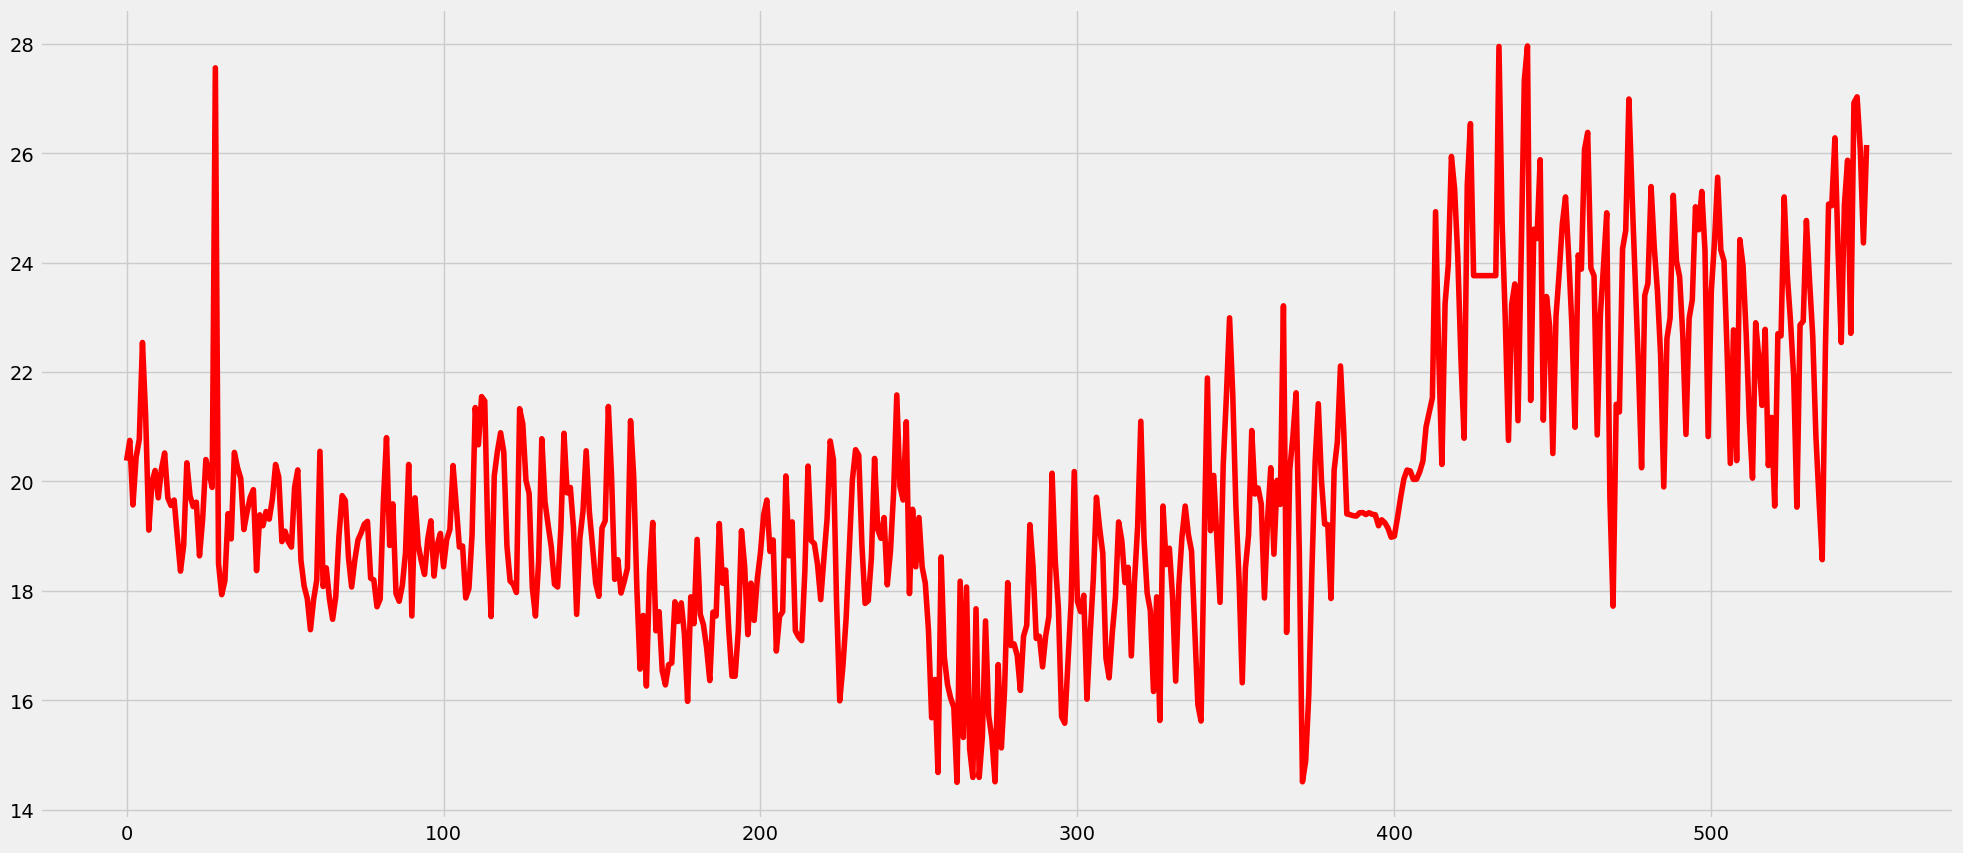

In [13]:
import matplotlib.pyplot as plt
views = data['Views'].values
ar = np.arange(len(views))
plt.figure(figsize=(22,10))
plt.plot(ar, views,'r')
plt.show()

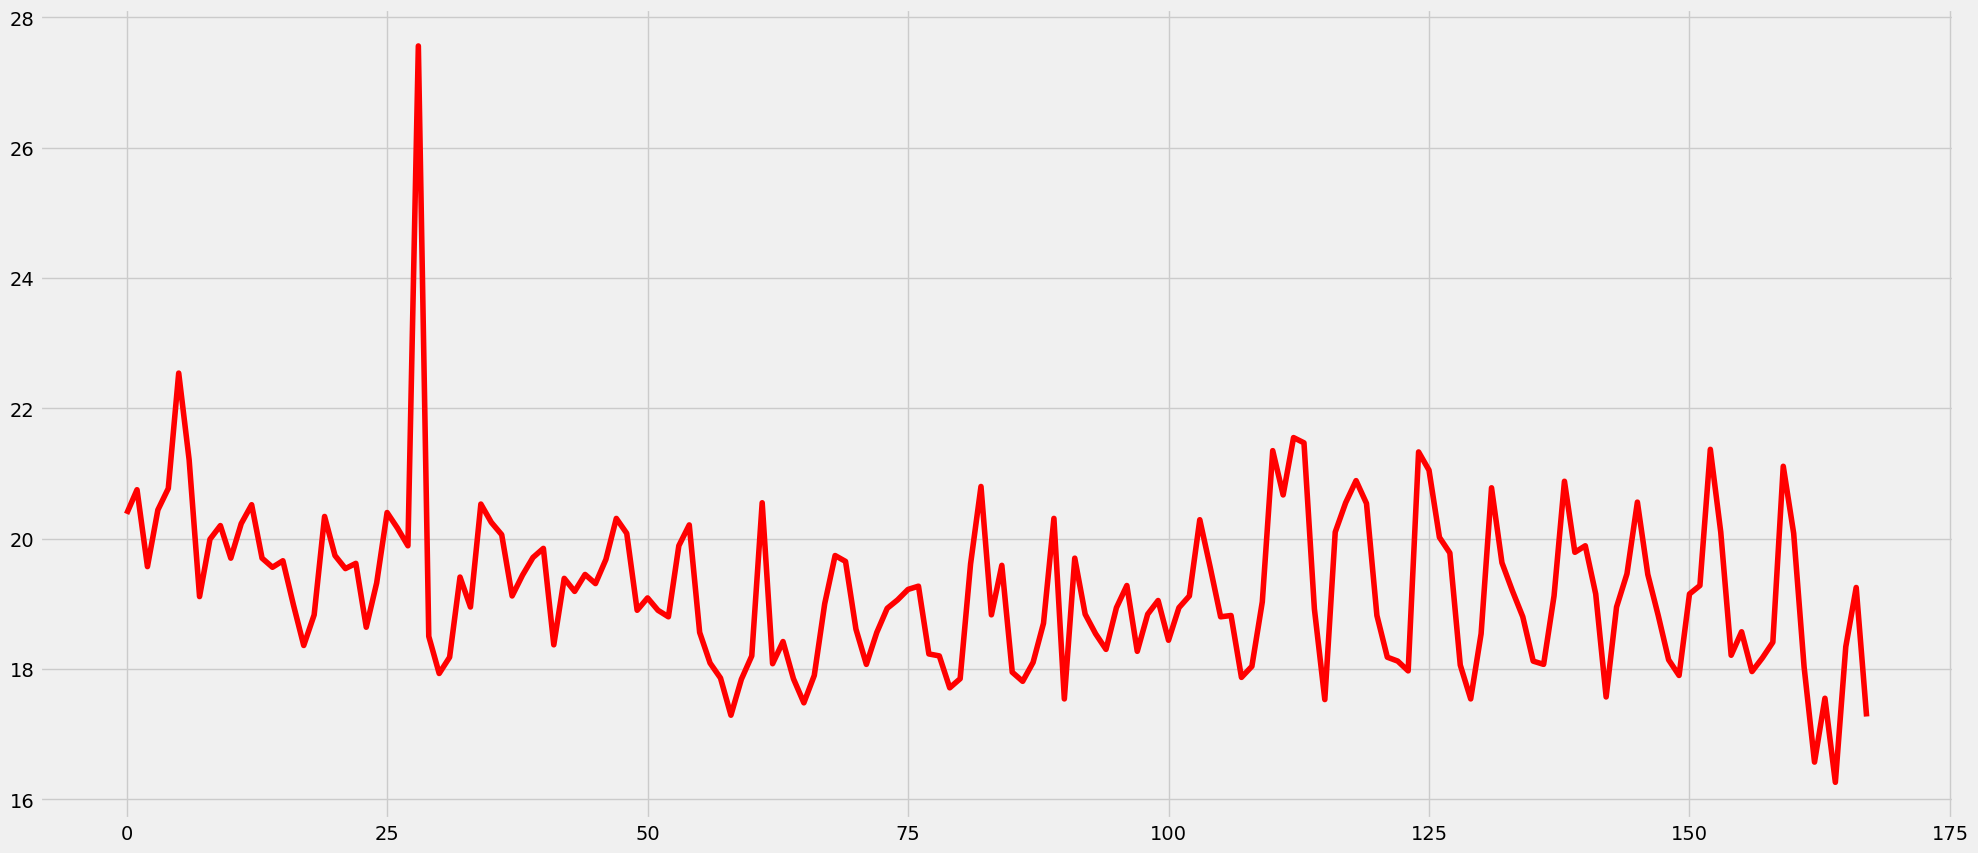

In [14]:
sample = views[:168]
ar = np.arange(len(sample))
plt.figure(figsize=(22,10))
plt.plot(ar, sample,'r')
plt.show()


In [15]:
def prepare_data(seq,num):
  x=[]
  y=[]
  for i in range(0,(len(seq)-num),1):
    
    input_ = seq[i:i+num]
    output  = seq[i+num]
    
    x.append(input_)
    y.append(output)
    
  return np.array(x), np.array(y)

In [17]:
num=168
x,y= prepare_data(views,num)
print(len(x))


382


In [18]:
ind = int(0.9 * len(x))
x_tr = x[:ind]
y_tr = y[:ind]
x_val=x[ind:]
y_val=y[ind:]


In [20]:
from sklearn.preprocessing import StandardScaler
x_scaler= StandardScaler()
x_tr = x_scaler.fit_transform(x_tr)
x_val= x_scaler.transform(x_val)

In [21]:
y_tr=y_tr.reshape(len(y_tr),1)
y_val=y_val.reshape(len(y_val),1)

In [22]:
y_scaler=StandardScaler()
y_tr = y_scaler.fit_transform(y_tr)[:,0]
y_val = y_scaler.transform(y_val)[:,0]

In [23]:
x_tr= x_tr.reshape(x_tr.shape[0],x_tr.shape[1],1)
x_val= x_val.reshape(x_val.shape[0],x_val.shape[1],1)
print(x_tr.shape)


(343, 168, 1)


In [31]:
def compute_moving_average(data):
  pred=[]
  for i in data:
    avg=np.sum(i)/len(i)
    pred.append(avg)
  return np.array(pred)


In [32]:
x_reshaped = x_val.reshape(-1,168)

In [33]:
y_pred = compute_moving_average(x_reshaped)

In [34]:
mse = np.sum ( (y_val - y_pred) **2 ) / (len(y_val))
print("Mean square of error:- ",mse)

Mean square of error:-  0.7186450255973043
